**Dataset**
labeled datasset collected from twitter (Lab 1 - Hate Speech.tsv)

**Objective**
classify tweets containing hate speech from other tweets. <br>
0 -> no hate speech <br>
1 -> contains hate speech <br>


**Evaluation metric**
macro f1 score

### Import used libraries

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', 500)

In [2]:
pip install  emoji

In [3]:
pip install gensim

In [4]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib as plt
import matplotlib.pyplot as plt
import plotly.express as px
from collections import Counter
import emoji
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import f1_score


# variables

In [ ]:
num_words = 50000
max_sequence_len = 50

### Load Dataset

###### Note: search how to load the data from tsv file

In [5]:
df = pd.read_csv("Hate Speech.tsv", sep= "\t", index_col='id')
df.head(100)

,label,tweet
id,,
1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
3,0,bihday your majesty
4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
5,0,factsguide: society now #motivation
6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦


In [6]:
df.count()

,0
label,31535
tweet,31535


In [7]:
for i, tweet in enumerate(df["tweet"].sample(10), 1):
    print(f"{i}. {tweet}\n")

1. i am appealing. #i_am #positive #affirmation

2. reading #afteryou trying not to cry   #reading @user

3. today i saw a guy who looked exactly like joe jonas and so naturally i said "joe jonas?!"and he turned around but it wasnt actually him  

4. appletstag #me #selfie   #smile #follow #love #cute #like4like #instalike #likeforlikeâ¦

5. @user attention seeking at the wrong time.

6. take risks: if you #win you will be  ,if you lose #you will be wise.  #orlando

7. no such thing as the #lgbt community. the most  &amp; #islamophobia i've experienced has been from white gay men.

8. coming soon to @user near you!

9. @user #allahsoil bernanke bailed out wall street by dumping $600 billion into the largest banks.

10. we're @user barry bound on our way to @user omg we've just read the sample menu #drool   ððð´ð¹ðâ¨



### insigths
@user not important

any word after # i think maybe helpfull

there is many puctatuion like exclamation mark , question mark and this ...

there is much - and extra spaces

 âº, â¦) → These need to be cleaned and decoded.


### Data splitting

It is a good practice to split the data before EDA helps maintain the integrity of the machine learning process, prevents data leakage, simulates real-world scenarios more accurately, and ensures reliable model performance evaluation on unseen data.

In [8]:
X=df.drop("label",axis=1)
y=df.label

In [9]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

### EDA on training data

- check NaNs

In [10]:
x_train.isnull().sum()

,0
tweet,0


In [11]:
y_train.isnull().sum()

0

- check duplicates

In [12]:
print(x_train.duplicated().sum())
df_duplicated = x_train[x_train.duplicated()]
df_duplicated.head(30)

1807


,tweet
id,
19819,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
27137,i'm so and #grateful now that - #affirmations
28048,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
21653,save $$ no logins x brokers #me #change #memes #love #education #university
12070,i am thankful for rain. #thankful #positive
26437,@user you might be a libtard if... #libtard #sjw #liberal #politics
828,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
9865,"watch #udtapunjab' to know reality: #bhagwantmann, #ghuggi tell -#bjp"
405,have my lover stop being angry at me visit us..&gt;&gt;&gt; #lover #friend #astrologer #love


In [13]:
x_train.drop_duplicates()

,tweet
id,
12411,have you you ever felt like the #nba was fixed? #bamboosled #marketing #nbafinals2016 #nbafinals
19281,@user dear @user please define #systemicracism and #economicapaheid what do you and or #da intend to do to addâ¦
30342,rise and shine! the #e32016 show floor opens today. #e3
30999,rdm and xia #avfc #optimistic roll on august!!! come on you lions!
17036,a dream is only a dream until you take action. make it happen! ðð #saterd... (vine by @user
...,...
30866,@user are you having as nice a day as these happy grapes? #weekend #sunshine #sun #grapes #saturday #fun #wine
18135,need #fun #easy #backgroundmusic? listen to this! --&gt; #royaltyfreemusic #stockmusic
28458,"so many men, too many choices....maybe i should shoot 4 videos in fl?! lmao... #thehowardroarkproject #casting"


- show a representative sample of data texts to find out required preprocessing steps

In [14]:
sample_texts = x_train.sample(n=5, random_state=42)
print(sample_texts)

                                                                                                                                       tweet
id                                                                                                                                          
15168                           #fathersday to all our #heros !!! let us #celebrate ðððððððððððððð
1547                                 #fathersday  everyone. may you be filled with the love of your abba father today.  #abba #familyrevival
5466                                                             i am in for the quebec city staircase run.   #run #fit #strong     #healthy
27614  daily #affirmation: i am committed to my goals and my success is assured.   #abundance #prosperity #beauty #belief #mindset #selflove
12492                                                                    more wedding dress shopping today ðð #lessthanayear #girltime


Hashtags (#): There are several hashtags like #fathersday, #heros, #celebrate, etc., which seem to indicate important topics or themes in the posts.

Emojis: There are emojis (e.g., ð), which may need to be either removed or processed depending on whether you want to preserve them for sentiment analysis or other purposes.

Text Formatting: The text includes multiple occurrences of spaces, and there are occasional issues with encoding (as seen with emojis).

- check dataset balancing

In [15]:
y.value_counts()

,count
label,
0,29322
1,2213


<Axes: >

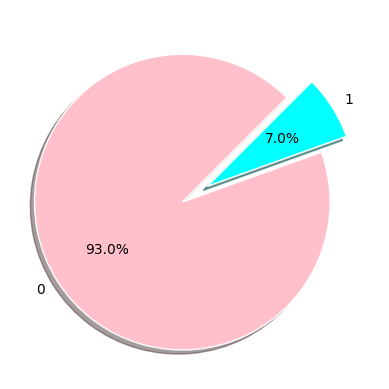

In [16]:
# fig = plt.figure(figsize=(7,7))
colors = ("pink", "cyan")
wp = {'linewidth':1, 'edgecolor':"white"}
tags = df['label'].value_counts()
explode = (0.1, 0.1)
tags.plot(kind='pie',autopct = '%1.1f%%', shadow=True, colors = colors, startangle =45,
         wedgeprops = wp, explode = explode, label='')

######## this is imbalance

- Cleaning and Preprocessing are:
    - 1
    - 2
    - 3
    - ... etc.

### Cleaning and Preprocessing

#### Extra: use custom scikit-learn Transformers

Using custom transformers in scikit-learn provides flexibility, reusability, and control over the data transformation process, allowing you to seamlessly integrate with scikit-learn's pipelines, enabling you to combine multiple preprocessing steps and modeling into a single workflow. This makes your code more modular, readable, and easier to maintain.

##### link: https://www.andrewvillazon.com/custom-scikit-learn-transformers/

#### Example usage:

In [17]:
class TextCleaningTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, text_column='tweet', download_nltk=True, return_tokens=True,join_tokens=True):
        """
        A custom transformer for cleaning text data

        Parameters:
        -----------
        text_column : str, default='tweet'
            The name of the column containing text to clean
        download_nltk : bool, default=True
            Whether to download NLTK resources
        return_tokens : bool, default=True
            Whether to return tokenized text or just cleaned text
        """
        self.text_column = text_column
        self.download_nltk = download_nltk
        self.return_tokens = return_tokens
        self.join_tokens = join_tokens

        # Download NLTK resources if needed
        if self.download_nltk:
            nltk.download('punkt', quiet=True)
            nltk.download('stopwords', quiet=True)

        self.stop_words = set(stopwords.words('english'))

    def fix_encoding(self, text):
        """Fix potential encoding issues"""
        if not isinstance(text, str):
            return ""
        try:
            return text.encode('latin1').decode('utf-8')
        except Exception:
            return text

    def clean_text(self, text):
        """Clean text by removing unwanted elements"""
        if not isinstance(text, str):
            return ""

        # Fix encoding
        text = self.fix_encoding(text)
        # Lowercase
        text = text.lower()
        # Remove @user
        text = re.sub(r'@[\w_]+', '', text)
        # Remove URLs
        text = re.sub(r'http\S+|www\S+|https\S+', '', text)
        # Remove hashtags (keep word)
        text = re.sub(r'#', '', text)
        # Convert emojis to text
        text = emoji.demojize(text, language='en')
        # Remove numbers
        text = re.sub(r'\d+', '', text)
        # Remove punctuation
        text = text.translate(str.maketrans('', '', string.punctuation))
        # Remove special characters except colons in emojis
        text = re.sub(r'[^\w\s:]', '', text)
        # Remove extra whitespace
        text = re.sub(r'\s+', ' ', text).strip()
        return text

    def tokenize_and_remove_stopwords(self, text):
        """Tokenize text and remove stopwords"""
        tokens = word_tokenize(text)
        filtered_tokens = [word for word in tokens if word not in self.stop_words]
        return filtered_tokens

    def fit(self, X, y=None):
        """Fit method (does nothing but required by sklearn API)"""
        return self

    def transform(self, X):
        """Transform the input data by cleaning the text"""
        X_transformed = X.copy()

        # Step 1: Fix encoding
        X_transformed['clean_text'] = X_transformed[self.text_column].apply(self.fix_encoding)

        # Step 2: Clean the text
        X_transformed['clean_text'] = X_transformed['clean_text'].apply(self.clean_text)

        # Step 3: Tokenize and remove stopwords if requested
        if self.return_tokens:
            X_transformed['tokens'] = X_transformed['clean_text'].apply(self.tokenize_and_remove_stopwords)
        if self.join_tokens:
            X_transformed['final'] = X_transformed['tokens'].apply(lambda tokens: ' '.join(tokens))

        return X_transformed

    def fit_transform(self, X, y=None):
        """Combine fit and transform methods"""
        return self.fit(X).transform(X)

In [18]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [19]:
text_cleaner = TextCleaningTransformer(text_column='tweet', download_nltk=True, return_tokens=True)

# Apply fit_transform on x_train
x_train_cleaned = text_cleaner.fit_transform(x_train)

# Apply only transform on x_test (using the fitted transformer)
x_test_cleaned = text_cleaner.transform(x_test)

In [20]:
x_train_cleaned

,tweet,clean_text,tokens,final
id,,,,
12411,have you you ever felt like the #nba was fixed? #bamboosled #marketing #nbafinals2016 #nbafinals,have you you ever felt like the nba was fixed bamboosled marketing nbafinals nbafinals,"[ever, felt, like, nba, fixed, bamboosled, marketing, nbafinals, nbafinals]",ever felt like nba fixed bamboosled marketing nbafinals nbafinals
19281,@user dear @user please define #systemicracism and #economicapaheid what do you and or #da intend to do to addâ¦,dear please define systemicracism and economicapaheid what do you and or da intend to do to add,"[dear, please, define, systemicracism, economicapaheid, da, intend, add]",dear please define systemicracism economicapaheid da intend add
30342,rise and shine! the #e32016 show floor opens today. #e3,rise and shine the e show floor opens today e,"[rise, shine, e, show, floor, opens, today, e]",rise shine e show floor opens today e
30999,rdm and xia #avfc #optimistic roll on august!!! come on you lions!,rdm and xia avfc optimistic roll on august come on you lions,"[rdm, xia, avfc, optimistic, roll, august, come, lions]",rdm xia avfc optimistic roll august come lions
17036,a dream is only a dream until you take action. make it happen! ðð #saterd... (vine by @user,a dream is only a dream until you take action make it happen bouquetbouquet saterd vine by,"[dream, dream, take, action, make, happen, bouquetbouquet, saterd, vine]",dream dream take action make happen bouquetbouquet saterd vine
...,...,...,...,...
29064,@user #model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,model i love u take with u all the time in urmobilephone kissingfacewithsmilingeyessmilingfacewithsunglassesmouthtonguesweatdropletssweatdropletssweatdroplets,"[model, love, u, take, u, time, urmobilephone, kissingfacewithsmilingeyessmilingfacewithsunglassesmouthtonguesweatdropletssweatdropletssweatdroplets]",model love u take u time urmobilephone kissingfacewithsmilingeyessmilingfacewithsunglassesmouthtonguesweatdropletssweatdropletssweatdroplets
18135,need #fun #easy #backgroundmusic? listen to this! --&gt; #royaltyfreemusic #stockmusic,need fun easy backgroundmusic listen to this gt royaltyfreemusic stockmusic,"[need, fun, easy, backgroundmusic, listen, gt, royaltyfreemusic, stockmusic]",need fun easy backgroundmusic listen gt royaltyfreemusic stockmusic
28458,"so many men, too many choices....maybe i should shoot 4 videos in fl?! lmao... #thehowardroarkproject #casting",so many men too many choicesmaybe i should shoot videos in fl lmao thehowardroarkproject casting,"[many, men, many, choicesmaybe, shoot, videos, fl, lmao, thehowardroarkproject, casting]",many men many choicesmaybe shoot videos fl lmao thehowardroarkproject casting


In [21]:
# Flatten the list of tokens
all_tokens = [token for tokens in x_train_cleaned['tokens'] for token in tokens]

# Get the frequency of each token
token_counts = Counter(all_tokens)

# Create a DataFrame from the Counter
token_freq_df = pd.DataFrame(token_counts.items(), columns=['Word', 'Frequency'])

# Sort the DataFrame by Frequency in descending order and take the top 10
top_10_tokens_df = token_freq_df.sort_values(by='Frequency', ascending=False).head(50)

# Create treemap
fig = px.treemap(top_10_tokens_df, path=['Word'], values='Frequency', title='Top 50 Most Common Words', color='Frequency')
fig.show()


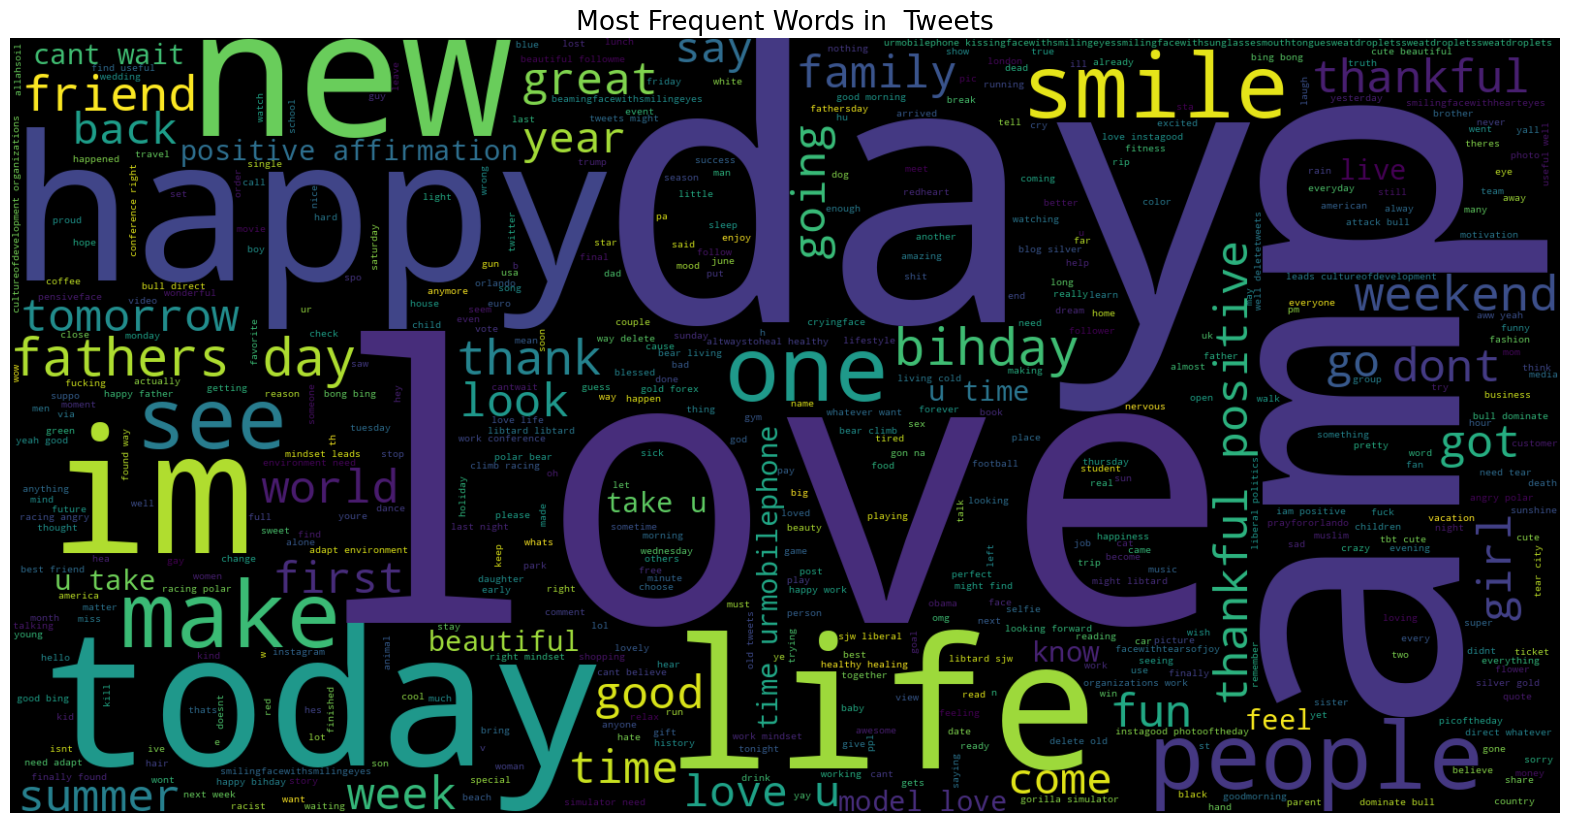

In [22]:


# Flatten the list of tokens
text = ' '.join([word for sublist in x_train_cleaned['tokens'] for word in sublist])

# Create the word cloud
plt.figure(figsize=(20, 15), facecolor='None')  # Adjust figure size for better visualization
wordcloud = WordCloud(max_words=500, width=1600, height=800, background_color="black").generate(text)

# Plot the word cloud
plt.imshow(wordcloud, interpolation='bilinear')  # Use bilinear interpolation for a smooth image
plt.axis('off')  # Turn off axis
plt.title('Most Frequent Words in  Tweets', fontsize=19)  # Set title font size
plt.show()  # Display the plot


##preprocessing

In [24]:
df_train=x_train_cleaned["final"]
df_test=x_test_cleaned["final"]

In [25]:
max_sequence_len = 0
for sentence in df_train:
    max_sequence_len = max(len(sentence), max_sequence_len)
print(max_sequence_len)

9936


In [26]:


tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train)

word_counts = tokenizer.word_counts
len(word_counts)


37706

In [27]:
import pandas as pd

word_freq = pd.DataFrame(list(word_counts.items()), columns=["word", "count"])
word_freq = word_freq.sort_values(by="count", ascending=False)


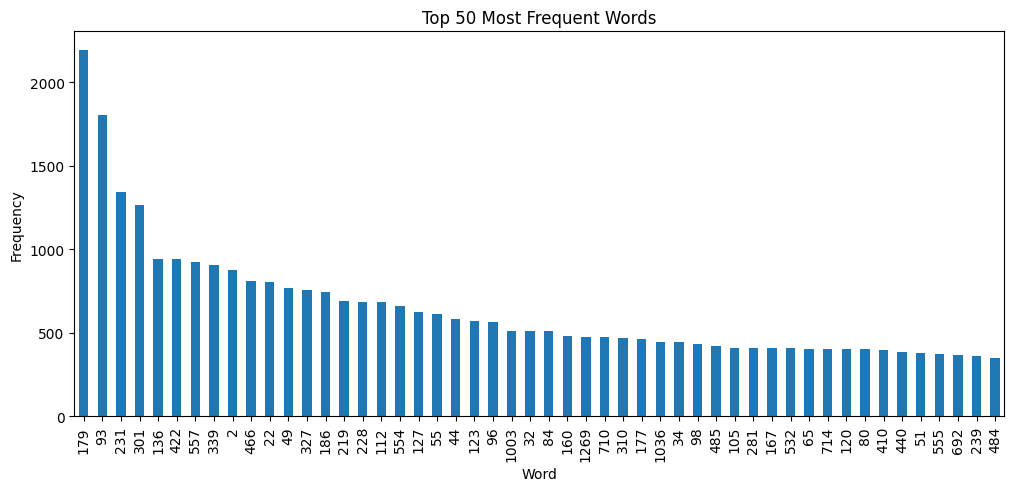

In [28]:
import matplotlib.pyplot as plt

word_freq["count"].head(50).plot(kind="bar", figsize=(12, 5))
plt.title("Top 50 Most Frequent Words")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()


# Tokenizing

In [30]:

tokenizer = Tokenizer(num_words = 50000, split = ' ', lower = True, oov_token = 'UNK')
tokenizer.fit_on_texts(df_train)
train = tokenizer.texts_to_sequences(df_train)
print(train[0])
x = pad_sequences(train)
print(x[0])
print(x.shape[1])

[122, 1288, 10, 962, 3146, 13165, 2107, 815, 815]
[   0    0    0 ... 2107  815  815]
1316


# Padding

In [32]:

train_padded_sequences = pad_sequences(
    train,
    maxlen=50,
    padding='post',
    truncating='post'
)

print(train_padded_sequences.shape)
print(train_padded_sequences[0])

(25228, 50)
[  122  1288    10   962  3146 13165  2107   815   815     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0]


In [33]:
test= tokenizer.texts_to_sequences(df_test)

In [34]:
test_padded_sequences = pad_sequences(test, maxlen=50, padding='post', truncating='post')

# Modeling

## RNN

In [37]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(50000, 16),
    tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(32)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [38]:


early_stop = EarlyStopping(
    monitor='val_loss',     # you can also use 'val_accuracy'
    patience=8,             # stop if no improvement for 5 epochs
    restore_best_weights=True,  # restores best model (not just last)
    verbose=1
)


In [39]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(0.001),
              metrics=['accuracy'])

In [40]:
y_test=y_test.to_numpy()
y_train=y_train.to_numpy()

In [41]:
history = model.fit(train_padded_sequences, y_train, epochs=30, batch_size=64,
                    validation_data=(test_padded_sequences, y_test),callbacks=[early_stop])


Epoch 1/30
395/395 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - accuracy: 0.9114 - loss: 0.2695 - val_accuracy: 0.9526 - val_loss: 0.1490
Epoch 2/30
395/395 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9783 - loss: 0.0683 - val_accuracy: 0.9575 - val_loss: 0.1323
Epoch 3/30
395/395 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.9963 - loss: 0.0132 - val_accuracy: 0.9575 - val_loss: 0.1717
Epoch 4/30
395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.9995 - loss: 0.0023 - val_accuracy: 0.9526 - val_loss: 0.2133
Epoch 5/30
395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.9999 - loss: 9.5437e-04 - val_accuracy: 0.9561 - val_loss: 0.2498
Epoch 6/30
395/395 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.9998 - loss: 0.0011 - val_accuracy: 0.9535 - val_loss: 0.2677
Epoch 7/30
395/395 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9997 - loss: 0.0015 - val_accuracy: 0.9547 - val_loss: 0.2805
Epoch 8/30
395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.9998 - loss: 6.665

In [42]:
test_loss, test_acc = model.evaluate(test_padded_sequences, y_test)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

198/198 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9575 - loss: 0.1343
Test Loss: 0.1323380470275879
Test Accuracy: 0.9575075507164001


In [44]:
p = model.predict(test_padded_sequences,verbose=1)
predicted = [int(round(x[0])) for x in p]


198/198 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [45]:
f1 = f1_score(y_test, predicted,average="macro")
print("F1 Score:", f1)


F1 Score: 0.8324244089810608


In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))


              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5831
           1       0.77      0.62      0.69       476

    accuracy                           0.96      6307
   macro avg       0.87      0.80      0.83      6307
weighted avg       0.95      0.96      0.96      6307



## GRU

In [47]:
gru_bi = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(50000, 16),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [48]:


early_stop = EarlyStopping(
    monitor='val_loss',     # you can also use 'val_accuracy'
    patience=8,             # stop if no improvement for 5 epochs
    restore_best_weights=True,  # restores best model (not just last)
    verbose=1
)


In [51]:
gru_bi.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(0.001),
              metrics=['accuracy'])

In [52]:
history = gru_bi.fit(train_padded_sequences, y_train, epochs=30, batch_size=32,
                    validation_data=(test_padded_sequences, y_test),callbacks=[early_stop])


Epoch 1/30
789/789 ━━━━━━━━━━━━━━━━━━━━ 54s 60ms/step - accuracy: 0.9389 - loss: 0.2391 - val_accuracy: 0.9553 - val_loss: 0.1384
Epoch 2/30
789/789 ━━━━━━━━━━━━━━━━━━━━ 80s 57ms/step - accuracy: 0.9806 - loss: 0.0573 - val_accuracy: 0.9604 - val_loss: 0.1369
Epoch 3/30
789/789 ━━━━━━━━━━━━━━━━━━━━ 85s 61ms/step - accuracy: 0.9939 - loss: 0.0189 - val_accuracy: 0.9547 - val_loss: 0.1655
Epoch 4/30
789/789 ━━━━━━━━━━━━━━━━━━━━ 44s 56ms/step - accuracy: 0.9969 - loss: 0.0102 - val_accuracy: 0.9572 - val_loss: 0.1943
Epoch 5/30
789/789 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - accuracy: 0.9983 - loss: 0.0054 - val_accuracy: 0.9518 - val_loss: 0.2260
Epoch 6/30
789/789 ━━━━━━━━━━━━━━━━━━━━ 79s 56ms/step - accuracy: 0.9990 - loss: 0.0043 - val_accuracy: 0.9409 - val_loss: 0.3518
Epoch 7/30
789/789 ━━━━━━━━━━━━━━━━━━━━ 46s 58ms/step - accuracy: 0.9992 - loss: 0.0021 - val_accuracy: 0.9497 - val_loss: 0.3812
Epoch 8/30
789/789 ━━━━━━━━━━━━━━━━━━━━ 84s 61ms/step - accuracy: 0.9993 - loss: 0.0024 - 

In [53]:
test_loss, test_acc = gru_bi.evaluate(test_padded_sequences, y_test)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

198/198 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9625 - loss: 0.1334
Test Loss: 0.1368779093027115
Test Accuracy: 0.9603614807128906


In [54]:
y_pred_probs = gru_bi.predict(test_padded_sequences)
y_pred = (y_pred_probs > 0.5).astype(int)


198/198 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step


In [55]:
f1 = f1_score(y_test, y_pred,average="macro")
print("F1 Score:", f1)


F1 Score: 0.8433409029127912


In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))


              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5831
           1       0.77      0.62      0.69       476

    accuracy                           0.96      6307
   macro avg       0.87      0.80      0.83      6307
weighted avg       0.95      0.96      0.96      6307



## LSTM

In [58]:
LSTM = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(50000, 16),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [59]:
LSTM.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [60]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',     # you can also use 'val_accuracy'
    patience=5,             # stop if no improvement for 5 epochs
    restore_best_weights=True,  # restores best model (not just last)
    verbose=1
)


In [61]:

# Train model
history=LSTM.fit(train_padded_sequences, y_train, validation_data=(test_padded_sequences, y_test),
          epochs=20, batch_size=32,  callbacks=[early_stop])


Epoch 1/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 63s 70ms/step - accuracy: 0.9331 - loss: 0.2341 - val_accuracy: 0.9531 - val_loss: 0.1316
Epoch 2/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - accuracy: 0.9793 - loss: 0.0631 - val_accuracy: 0.9608 - val_loss: 0.1236
Epoch 3/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - accuracy: 0.9923 - loss: 0.0244 - val_accuracy: 0.9540 - val_loss: 0.1430
Epoch 4/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 83s 61ms/step - accuracy: 0.9967 - loss: 0.0118 - val_accuracy: 0.9543 - val_loss: 0.2106
Epoch 5/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 79s 57ms/step - accuracy: 0.9981 - loss: 0.0074 - val_accuracy: 0.9507 - val_loss: 0.2260
Epoch 6/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 48s 61ms/step - accuracy: 0.9987 - loss: 0.0052 - val_accuracy: 0.9521 - val_loss: 0.2764
Epoch 7/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 79s 58ms/step - accuracy: 0.9993 - loss: 0.0021 - val_accuracy: 0.9594 - val_loss: 0.2819
Epoch 7: early stopping
Restoring model weights from the end of the best epoch: 2.


In [62]:
test_loss, test_acc = LSTM.evaluate(test_padded_sequences, y_test)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

198/198 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9611 - loss: 0.1227
Test Loss: 0.12360755354166031
Test Accuracy: 0.960837185382843


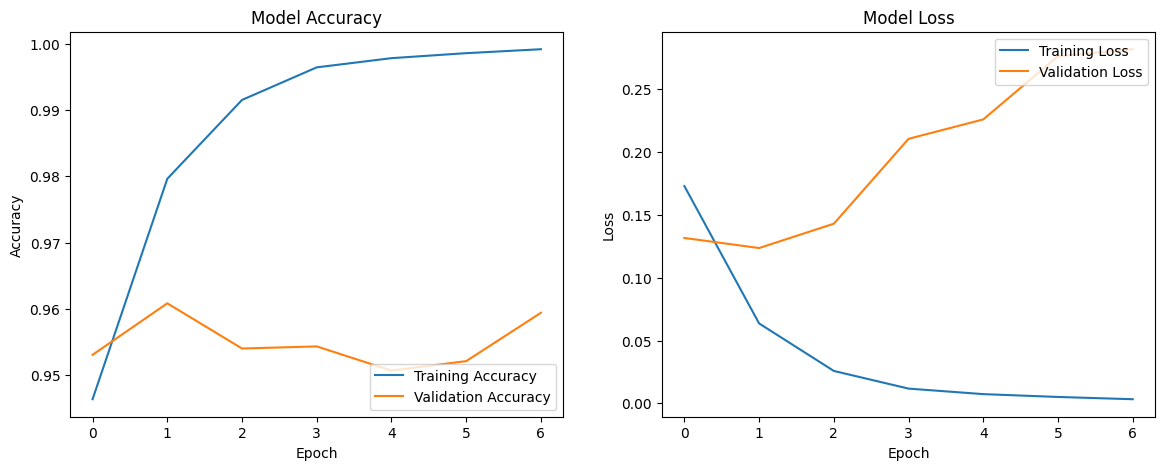

In [63]:
# Plot the training accuracy and loss
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()


In [64]:
p = LSTM.predict(test_padded_sequences,verbose=1)
predicted = [int(round(x[0])) for x in p]
actual = y_test


198/198 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step


In [65]:
f1 = f1_score(y_test, predicted,average="macro")
print("F1 Score:", f1)


F1 Score: 0.8349789755179586


In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))


              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5831
           1       0.85      0.58      0.69       476

    accuracy                           0.96      6307
   macro avg       0.91      0.79      0.83      6307
weighted avg       0.96      0.96      0.96      6307



In [67]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, cohen_kappa_score, confusion_matrix, roc_auc_score
)
import numpy as np

class EvaluateBinaryClassification:
    def __init__(self, gnd_truths, predictions):
        self.y_true = gnd_truths
        self.y_pred = predictions
        self.evaluate()

    def evaluate(self):
        cm = confusion_matrix(self.y_true, self.y_pred)
        tn, fp, fn, tp = cm.ravel()

        self.total = len(self.y_true)
        self.positive = sum(self.y_true)
        self.negative = self.total - self.positive
        self.tp = tp
        self.tn = tn
        self.fp = fp
        self.fn = fn
        self.accuracy = accuracy_score(self.y_true, self.y_pred)
        self.precision = precision_score(self.y_true, self.y_pred)
        self.recall = recall_score(self.y_true, self.y_pred)
        self.f1 = f1_score(self.y_true, self.y_pred)
        self.kappa = cohen_kappa_score(self.y_true, self.y_pred)
        self.auc = roc_auc_score(self.y_true, self.y_pred)

    def get_full_report(self):
        print("EvaluateBinaryClassification Object Created\n")
        print(f"Total Samples\t{self.total}")
        print(f"Positive Samples\t{self.positive}")
        print(f"Negative Samples\t{self.negative}")
        print(f"True Positive\t{self.tp}")
        print(f"True Negative\t{self.tn}")
        print(f"False Positive\t{self.fp}")
        print(f"False Negative\t{self.fn}")
        print(f"Accuracy\t{self.accuracy}")
        print(f"Precision\t{self.precision}")
        print(f"Recall\t{self.recall}")
        print(f"F1 Measure\t{self.f1}")
        print(f"Cohen Kappa Score\t{self.kappa}")
        print(f"Area Under Curve\t{self.auc}")


In [68]:
ebc = EvaluateBinaryClassification(gnd_truths=y_test, predictions=y_pred)
print(ebc.get_full_report())


EvaluateBinaryClassification Object Created

Total Samples	6307
Positive Samples	476
Negative Samples	5831
True Positive	303
True Negative	5754
False Positive	77
False Negative	173
Accuracy	0.9603615030918028
Precision	0.7973684210526316
Recall	0.6365546218487395
F1 Measure	0.7079439252336449
Cohen Kappa Score	0.686968436968437
Area Under Curve	0.8116746698679471
None


In [74]:
def predict_hate(text, threshold=0.5):
    """
    Predict if the given text is hate speech or not.

    Args:
        text (str): Input text.
        threshold (float): Probability threshold for classification.

    Returns:
        dict: Contains label and probability.
    """
    # Convert to sequence and pad
    sequence = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(sequence, maxlen=50, padding='post', truncating='post')

    # Predict
    prob = model.predict(padded)[0][0]
    label = "Hate Speech" if prob >= threshold else "Not Hate Speech"

    return {
        "label": label,
        "probability": float(round(prob, 4))
    }

# 💡 Example usage:
print(predict_hate(" you are stupid,I hate you"))
print(predict_hate("Hope you have a great day!"))



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
{'label': 'Hate Speech', 'probability': 0.7965999841690063}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
{'label': 'Not Hate Speech', 'probability': 0.04809999838471413}


#### Done!